# 仿射变换与透视变换
![](http://jupter-oss.oss-cn-hangzhou.aliyuncs.com/public/files/image/1095279207225/1547435491894_rYMBHDAnlh.jpg)

常见的2D图像变换从原理上讲主要包括基于2×3矩阵的仿射变换和基于3×3矩阵透视变换。

## 仿射变换
基本的图像变换就是二维坐标的变换：从一种二维坐标(x,y)到另一种二维坐标(u,v)的线性变换：

$$u=a_1x+b_1y+c_1$$

$$v=a_2x+b_2y+c_2$$

如果写成矩阵的形式，就是：

$$
\left[
 \begin{matrix}
   u \\
   v
  \end{matrix} 
\right]
=
\left[
 \begin{matrix}
   a_1 & b_1 \\
   a_2 & b_2
  \end{matrix} 
\right]
\left[
 \begin{matrix}
   x \\
   y 
  \end{matrix} 
\right]
+
\left[
 \begin{matrix}
   c_1 \\
   c_2
  \end{matrix} 
\right]
$$

作如下定义：
$$
R=
\left[
 \begin{matrix}
   a_1 & b_1 \\
   a_2 & b_2
  \end{matrix} 
\right]
,
t=
\left[
 \begin{matrix}
   c_1 \\
   c_2
  \end{matrix} 
\right]
，
T=
\left[
 \begin{matrix}
   R & t \\
  \end{matrix} 
\right]
$$

矩阵T(2×3)就称为仿射变换的变换矩阵，R为线性变换矩阵，t为平移矩阵，简单来说，仿射变换就是线性变换+平移。变换后直线依然是直线，平行线依然是平行线，直线间的相对位置关系不变，因此非共线的三个对应点便可确定唯一的一个仿射变换，线性变换4个自由度+平移2个自由度→仿射变换自由度为6。

![](http://jupter-oss.oss-cn-hangzhou.aliyuncs.com/public/files/image/1095279207225/1547437292127_YcgVA6mway.jpg)

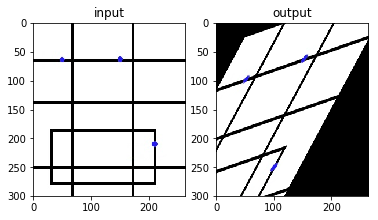

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

img=cv2.imread('drawing.jpg')
rows,cols=img.shape[:2]

#变换前3个点
pts1=np.float32([[50,65],[150,65],[210,210]])
#变换后三个点
pts2=np.float32([[50,100],[150,65],[100,250]])

#生成变换矩阵
M=cv2.getAffineTransform(pts1,pts2)
dst=cv2.warpAffine(img,M,(cols,rows))

plt.subplot(121)
plt.imshow(img),plt.title('input')
plt.subplot(122)
plt.imshow(dst),plt.title('output')
plt.show()

平移旋转缩放和翻转分别对应不同的变换矩阵。

### 平移
![](http://jupter-oss.oss-cn-hangzhou.aliyuncs.com/public/files/image/1095279207225/1547437504407_lTtWxcMEPZ.jpg)

平移就是x和y方向的直接移动，可以上下/左右移动，自由度为2，变换矩阵表示为：
$$
u=x+t_x  \\
v=y+t_y
$$

$$
\left[
 \begin{matrix}
   u \\
   v
  \end{matrix} 
\right]
=
\left[
 \begin{matrix}
   1 & 0 \\
   0 & 1
  \end{matrix} 
\right]
\left[
 \begin{matrix}
   x \\
   y 
  \end{matrix} 
\right]
+
\left[
 \begin{matrix}
   t_x \\
   t_y
  \end{matrix} 
\right]
$$

###  旋转
![](http://jupter-oss.oss-cn-hangzhou.aliyuncs.com/public/files/image/1095279207225/1547437614554_0st0ufUa3H.jpg)

旋转是坐标轴方向绕原点旋转一定的角度θ，自由度为1，不包含平移，如顺时针旋转可以表示为：

$$
u=xcos\theta-ysin\theta \\
v=xsin\theta+ycos\theta
$$

$$
\left[
 \begin{matrix}
   u \\
   v
  \end{matrix} 
\right]
=
\left[
 \begin{matrix}
   cos\theta & -sin\theta \\
   sin\theta & cos\theta
  \end{matrix} 
\right]
\left[
 \begin{matrix}
   x \\
   y 
  \end{matrix} 
\right]
+
\left[
 \begin{matrix}
   0 \\
   0
  \end{matrix} 
\right]
$$

### 翻转
翻转是x或y某个方向或全部方向上取反，自由度为2，比如这里以垂直翻转为例：

$$
u=x \\
v=-y
$$

$$
\left[
 \begin{matrix}
   u \\
   v
  \end{matrix} 
\right]
=
\left[
 \begin{matrix}
   1 & 0 \\
   0 & -1
  \end{matrix} 
\right]
\left[
 \begin{matrix}
   x \\
   y 
  \end{matrix} 
\right]
+
\left[
 \begin{matrix}
   0 \\
   0
  \end{matrix} 
\right]
$$

### 刚体变换

旋转+平移也称刚体变换（Rigid Transform），就是说如果图像变换前后两点间的距离仍然保持不变，那么这种变化就称为刚体变换。刚体变换包括了平移、旋转和翻转，自由度为3。旋转和平移变换矩阵可以表示为：

$$
u=xcos\theta-ysin\theta+t_x \\
v=xsin\theta+ycos\theta+t_y
$$

$$
\left[
 \begin{matrix}
   u \\
   v
  \end{matrix} 
\right]
=
\left[
 \begin{matrix}
   cos\theta & -sin\theta \\
   sin\theta & cos\theta
  \end{matrix} 
\right]
\left[
 \begin{matrix}
   x \\
   y 
  \end{matrix} 
\right]
+
\left[
 \begin{matrix}
   t_x \\
   t_y
  \end{matrix} 
\right]
$$

由于只是旋转和平移，刚体变换保持了直线间的长度不变，所以也称欧式变换（变化前后保持欧氏距离）。

### 缩放
缩放是x和y方向的尺度（倍数）变换，在有些资料上非等比例的缩放也称为拉伸/挤压，等比例缩放自由度为1，非等比例缩放自由度为2，矩阵可以表示为：

$$
u=s_xx \\
v=s_yy
$$

$$
\left[
 \begin{matrix}
   u \\
   v
  \end{matrix} 
\right]
=
\left[
 \begin{matrix}
   s_x & 0 \\
   0 & s_y
  \end{matrix} 
\right]
\left[
 \begin{matrix}
   x \\
   y 
  \end{matrix} 
\right]
+
\left[
 \begin{matrix}
   0 \\
   0
  \end{matrix} 
\right]
$$

### 相似变换

相似变换又称缩放旋转，相似变换包含了旋转、等比例缩放和平移等变换，自由度为4。在OpenCV中，旋转就是用相似变换实现的：

若缩放比例为scale，旋转角度为 θ ，旋转中心是$(center_x,center_y)$，则仿射变换可以表示为：
$$
\left[
 \begin{matrix}
   u \\
   v
  \end{matrix} 
\right]
=
\left[
 \begin{matrix}
   \alpha & \beta \\
   -\beta & \alpha
  \end{matrix} 
\right]
\left[
 \begin{matrix}
   x \\
   y 
  \end{matrix} 
\right]
+
\left[
 \begin{matrix}
   (1-\alpha)center_x-\beta center_y \\
   \beta center_y+(1-\alpha)center_x
  \end{matrix} 
\right]
\\
\alpha=scale * cos\theta\\
\beta=scale * sin\theta
$$

相似变换相比刚体变换加了缩放，所以并不会保持欧氏距离不变，但直线间的夹角依然不变。
![](http://jupter-oss.oss-cn-hangzhou.aliyuncs.com/public/files/image/1095279207225/1547443196475_fuxx7CbI0O.jpg)

|变换|矩阵|自由度|保持性质|
|:-:|:-:|:-:|:-:|
|平移[I,t]|2x3|2|方向，长度，夹角，平行性，直线性|
|刚体[R,t]|2x3|3|长度，夹角，平行性，直线性|
|相似[sR,t]|2x3|4|夹角，平行性，直线性|
|仿射[T]|2x3|6|平行性，直线性|
|透视[T]|2x3|8|直线性|

### 透视变换
仿射变换后依然是平行四边形，并不能做到任意的变换。
![](http://jupter-oss.oss-cn-hangzhou.aliyuncs.com/public/files/image/1095279207225/1547443423242_EgQu6fcnqf.jpg)

透视变换（Perspective Transformation）是将二维的图片投影到一个三维视平面上，然后再转换到二维坐标下，所以也称为投影映射（Projective Mapping）。简单来说就是二维→三维→二维的一个过程。

$$
X=a_1x+b_1y+c_1 \\
Y=a_2x+b_2y+c_2 \\
Z=a_3x+b_3y+c_3
$$

$$
\left[
 \begin{matrix}
   X \\
   Y \\
   Z
  \end{matrix} 
\right]
=
\left[
 \begin{matrix}
   a_1 & b_1 & c_1 \\
   a_2 & b_2 & c_2 \\
   a_3 & b_3 & c_3
  \end{matrix} 
\right]
\left[
 \begin{matrix}
   x \\
   y \\
   1
  \end{matrix} 
\right]
$$

其中，$\left[
 \begin{matrix}
   a_1 & b_1 \\
   a_2 & b_2 
  \end{matrix} 
\right]$
 表示线性变换，
 $
\left[
 \begin{matrix}
   a_3 & b_3
  \end{matrix} 
\right]
$
产生透视变换，其余表示平移变换，因此仿射变换是透视变换的子集。接下来再通过除以Z轴转换成二维坐标：